<a href="https://colab.research.google.com/github/Piranavan25/ml-portfolio/blob/main/rps-game/src/rps_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Accuracy: 1.0


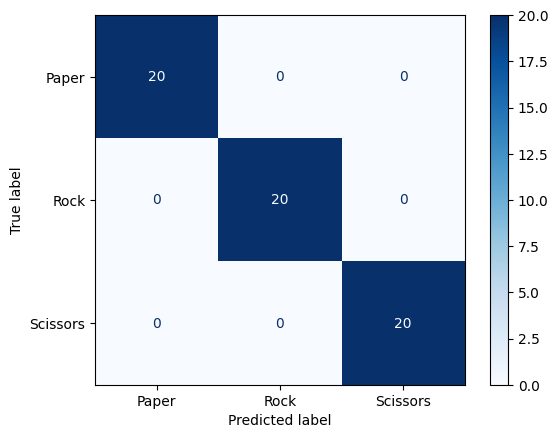

In [ ]:
# ML-based Rock-Paper-Scissors


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib  # to save the model

#  Load Dataset
DATA_FILE = "rps_hand_landmarks.csv"
df = pd.read_csv(DATA_FILE, header=0)

# Features are all columns except last, last column is the label
X = df.iloc[:, :-1].values.astype(np.float32)
y = df.iloc[:, -1].values  # Rock/Paper/Scissors labels

#  Encode Labels

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts labels to 0,1,2

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#  Train Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Save trained model
joblib.dump(clf, "rps_gesture_model.pkl")
joblib.dump(le, "rps_label_encoder.pkl")

#  Evaluate Model
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap="Blues")

#  Predict New Sample (Optional)
# Example: predict a new hand landmark vector
# sample = np.array([x0, y0, z0, x1, y1, z1, ..., x20, y20, z20]).reshape(1, -1)
# pred_label = le.inverse_transform(clf.predict(sample))
